In [123]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
# datetime for dt conversion
from datetime import datetime

# Import API key
from config import weather_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
cities_data_file = "../Resources/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [124]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []
countries_list = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    country = citipy.nearest_city(lat_lng[0], lat_lng[1]).country_code
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
        countries_list.append(country)


# Print the city count to confirm sufficient count
len(cities)

628

In [125]:
cities

['vaini',
 'hermanus',
 'port elizabeth',
 'ponta do sol',
 'simao',
 'sao filipe',
 'saint-georges',
 'haines junction',
 'green river',
 'bardiyah',
 'chalinze',
 'kavieng',
 'gunjur',
 'avarua',
 'kushmurun',
 'marawi',
 'rikitea',
 'damaturu',
 'cape town',
 'kastamonu',
 'ingelheim',
 'chumikan',
 'chuy',
 'sterlibashevo',
 'illoqqortoormiut',
 'atuona',
 'severo-kurilsk',
 'okha',
 'mataura',
 'nabire',
 'broome',
 'mahebourg',
 'port alfred',
 'campbell river',
 'ayan',
 'grand river south east',
 'dalinghe',
 'dikson',
 'lasem',
 'chokurdakh',
 'qaanaaq',
 'muros',
 'constitucion',
 'luderitz',
 'susanville',
 'haflong',
 'jinxiang',
 'paamiut',
 'hambantota',
 'punta arenas',
 'chute-aux-outardes',
 'komsomolskiy',
 'marsh harbour',
 'vung tau',
 'raudeberg',
 'kapaa',
 'ponta delgada',
 'khatanga',
 'nikolskoye',
 'hobart',
 'gat',
 'akyab',
 'albany',
 'pedernales',
 'ushuaia',
 'lompoc',
 'camana',
 'ler',
 'hilo',
 'puerto ayora',
 'taolanaro',
 'ipixuna',
 'labutta',
 'la

In [126]:
countries_list

['to',
 'za',
 'za',
 'cv',
 'cn',
 'cv',
 'gf',
 'ca',
 'us',
 'ly',
 'tz',
 'pg',
 'gm',
 'ck',
 'kz',
 'sd',
 'pf',
 'ng',
 'za',
 'tr',
 'de',
 'ru',
 'uy',
 'ru',
 'gl',
 'pf',
 'ru',
 'ru',
 'pf',
 'id',
 'au',
 'mu',
 'za',
 'ca',
 'ru',
 'mu',
 'cn',
 'ru',
 'id',
 'ru',
 'gl',
 'es',
 'mx',
 'na',
 'us',
 'in',
 'cn',
 'gl',
 'lk',
 'cl',
 'ca',
 'ru',
 'bs',
 'vn',
 'no',
 'us',
 'pt',
 'ru',
 'ru',
 'au',
 'ly',
 'mm',
 'au',
 'do',
 'ar',
 'us',
 'pe',
 'sd',
 'us',
 'ec',
 'mg',
 'br',
 'mm',
 'id',
 'za',
 'ru',
 'ru',
 'pw',
 'in',
 'cn',
 'mr',
 'ru',
 'ca',
 'au',
 'gb',
 'ci',
 'vn',
 'gf',
 'ca',
 'fi',
 'sh',
 'pe',
 'us',
 'nz',
 'nz',
 'ng',
 'ru',
 'au',
 'cn',
 'ru',
 'ru',
 'ar',
 'ca',
 'dz',
 'kr',
 'ie',
 'au',
 'pf',
 'za',
 'br',
 'sh',
 'us',
 'ki',
 'au',
 'gb',
 'cn',
 'ug',
 'us',
 'mn',
 'ru',
 'pt',
 'za',
 'es',
 'ru',
 'td',
 'ag',
 'cn',
 'dz',
 'au',
 'us',
 'br',
 'us',
 'sj',
 'gl',
 'pk',
 'yt',
 'cl',
 're',
 'mv',
 've',
 'au',
 'vu',
 'br',

In [127]:
# Combine the two lists into a list of tuples using the zip function
city_country = zip(cities,countries_list)        
        
list(city_country)

[('vaini', 'to'),
 ('hermanus', 'za'),
 ('port elizabeth', 'za'),
 ('ponta do sol', 'cv'),
 ('simao', 'cn'),
 ('sao filipe', 'cv'),
 ('saint-georges', 'gf'),
 ('haines junction', 'ca'),
 ('green river', 'us'),
 ('bardiyah', 'ly'),
 ('chalinze', 'tz'),
 ('kavieng', 'pg'),
 ('gunjur', 'gm'),
 ('avarua', 'ck'),
 ('kushmurun', 'kz'),
 ('marawi', 'sd'),
 ('rikitea', 'pf'),
 ('damaturu', 'ng'),
 ('cape town', 'za'),
 ('kastamonu', 'tr'),
 ('ingelheim', 'de'),
 ('chumikan', 'ru'),
 ('chuy', 'uy'),
 ('sterlibashevo', 'ru'),
 ('illoqqortoormiut', 'gl'),
 ('atuona', 'pf'),
 ('severo-kurilsk', 'ru'),
 ('okha', 'ru'),
 ('mataura', 'pf'),
 ('nabire', 'id'),
 ('broome', 'au'),
 ('mahebourg', 'mu'),
 ('port alfred', 'za'),
 ('campbell river', 'ca'),
 ('ayan', 'ru'),
 ('grand river south east', 'mu'),
 ('dalinghe', 'cn'),
 ('dikson', 'ru'),
 ('lasem', 'id'),
 ('chokurdakh', 'ru'),
 ('qaanaaq', 'gl'),
 ('muros', 'es'),
 ('constitucion', 'mx'),
 ('luderitz', 'na'),
 ('susanville', 'us'),
 ('haflong', 'i

In [128]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Build partial query URL
query_url = f"{url}appid={weather_key}&units={units}&q="

# See what the links lay out looks like
city_url_test = f"{url}appid={weather_key}&units={units}&q=mataura"
city_country_url_test = f"{url}appid={weather_key}&units={units}&q=jamestown"
city_country_url_test = f"{url}appid={weather_key}&units={units}&q=tumbes,pe"

# print(city_country_url_test)



In [129]:
# Open file to write results of API calls - success or not into a txt file, as well as all data pulled into a csv
success_city_list = open('weatherAPI_printlog.txt', 'w')
city_data_outcome = open('city_weather_outcome.txt', 'w')
api_data_outcome = open('weatherAPI_data.csv', 'w')
# Header's for csv files
api_data_outcome.write("city_id,city_name,country,latitude,longitude,weather_date,temp,humidity,cloudiness,wind_speed\n")

94

In [130]:

# set up lists to hold reponse info
# in ['coord']
lon = []
lat = []
# in ['weather']
weather_id = []
main_weather = []
weather_description = []
weather_icon = []
# in ['base']
base_base = []
# in ['main]
main_temp = []
main_feels_like = []
main_temp_min = []
main_temp_max = []
main_pressure = []
main_humidity = []
# in ['visibility']
visibility_visibility = []
# in ['wind']
wind_speed = []
wind_deg = []
# in ['clouds']
clouds_all = []
# in ['dt']
dt_weather_data = []
# in ['sys']
sys_type = []
sys_id = []
sys_country = []
sys_sunrise = []
sys_sunset = []
# in ['timezone']
timezone_timezone = []
# in ['id']
city_id = []
# in ['name']
city_name = []
# in ['cod']
cod_cod = []

number = []

# Loop through the list of cities and perform a request for data on each
for city in cities:
    response = requests.get(query_url + city).json()

    # to get the number of city in for loop
    number.append(city)
    number_of_city = len(number)
    try:
        # first dict
        lon.append(response['coord']['lon'])
        lon_only = response['coord']['lon']
        lat.append(response['coord']['lat'])
        lat_only = response['coord']['lat']


        # second dict
        # weather_id.append(response['weather'][0]['id'])
        # main_weather.append(response['weather'][0]['main'])
        # weather_description.append(response['weather'][0]['description'])
        # weather_icon.append(response['weather'][0]['icon'])

        # third dict
        # base_base.append(response['base'])

        # fourth dict
        main_temp.append(response['main']['temp'])
        main_temp_only = response['main']['temp']
        # main_feels_like.append(response['main']['feels_like'])
        main_temp_min.append(response['main']['temp_min'])
        main_temp_min_only = response['main']['temp_min']
        main_temp_max.append(response['main']['temp_max'])
        main_temp_max_only = response['main']['temp_max']
        # main_pressure.append(response['main']['pressure'])
        main_humidity.append(response['main']['humidity'])
        main_humidity_only = response['main']['humidity']

        # fifth dict
        # visibility_visibility.append(response['visibility'])

        # sixth dict
        wind_speed.append(response['wind']['speed'])
        wind_speed_only = response['wind']['speed']
        # wind_deg.append(response['wind']['deg'])

        # seventh dict
        clouds_all.append(response['clouds']['all'])
        clouds_all_only = response['clouds']['all']
        # eight dict
        dt_weather_date = (datetime.fromtimestamp(response['dt'])).strftime('%m/%d/%y')
        dt_weather_data.append(dt_weather_date)

        # ninth dict
        # sys_type.append(response['sys']['type'])
        # sys_id.append(response['sys']['id'])
        sys_country.append(response['sys']['country'])
        sys_country_only = response['sys']['country']
        # sys_sunrise.append(response['sys']['sunrise'])
        # sys_sunset.append(response['sys']['sunset'])

        # tenth dict
        # timezone_timezone.append(response['timezone'])

        # eleventh dict
        city_id.append(response['id'])
        city_id_only = int(response['id'])

        # twelveth dict
        city_name.append(response['name'])
        city_name_only = response['name']

        # thirteen dict
        # cod_cod.append(response['cod'])
        
        
        # Output line to terminal to mark progress and store it to a print log text file
        print(f"{number_of_city}. {city_name_only} with city ID:{city_id_only} was found in the Weathermap API\n")
        success_city_list.write(f"Success found: {city_name_only}  City ID:{city_id_only} \n")
        
        # Output all retreived values to a csv file

        city_data_outcome.write(f"The outcome data of {city_name_only}, {sys_country_only}: Lat & Lon --> {lat_only},{lon_only} Weather Date --> {dt_weather_date} Weather --> Temperature, Max Temp and Min Temp: {main_temp_only} & {main_temp_max_only} & {main_temp_min_only} Humidity: {main_humidity_only} Clouds: {clouds_all_only} Wind Speed: {wind_speed_only}\n")

        api_data_outcome.write(f"{city_id_only},{city_name_only},{sys_country_only},{lat_only},{lon_only},{dt_weather_date},\
            {main_temp_max_only},{main_humidity_only},{clouds_all_only},{wind_speed_only}\n")

    # Handle exceptions for a character that is not available 
    except:
        success_city_list.write(f"{number_of_city}. {city} was not found. \n")
        print(" - " * 10)
        print(f"{number_of_city}. {city} was not found" )
        print(" - " * 10)

        # Append null values so lists are all the same length (later we will remove nulls from dataframe)
        city_id.append(None)
        city_name.append(None)
        sys_country.append(None)
        lat.append(None)
        lon.append(None)
        dt_weather_data.append(None)
        main_temp.append(None)
        main_temp_max.append(None)
        main_temp_min.append(None)
        main_humidity.append(None)
        clouds_all.append(None)
        wind_speed.append(None)
        #keep code going
        pass


# After getting data in a for loop... we want to make sure our text file's do not change... basically convert our text files to raw data
success_city_list.close()
city_data_outcome.close()
api_data_outcome.close()

1. Vaini with city ID:4032243 was found in the Weathermap API

2. Hermanus with city ID:3366880 was found in the Weathermap API

3. Port Elizabeth with city ID:964420 was found in the Weathermap API

4. Ponta do Sol with city ID:2264557 was found in the Weathermap API

5. Simao with city ID:1794209 was found in the Weathermap API

6. São Filipe with city ID:3374210 was found in the Weathermap API

7. St. George's with city ID:3579925 was found in the Weathermap API

8. Haines Junction with city ID:5969025 was found in the Weathermap API

9. Green River with city ID:5826559 was found in the Weathermap API

10. Al Bardīyah with city ID:80509 was found in the Weathermap API

 -  -  -  -  -  -  -  -  -  - 
10. bardiyah was not found
 -  -  -  -  -  -  -  -  -  - 
11. Chalinze with city ID:160660 was found in the Weathermap API

12. Kavieng with city ID:2094342 was found in the Weathermap API

13. Gunjur with city ID:2413419 was found in the Weathermap API

14. Avarua with city ID:4035715 w

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [131]:
# create a dictionary from the lists that we created above
weather_table_dict = {
    "city_id": city_id,
    "city_name": city_name,
    "country": sys_country,
    "latitude": lat,
    "longitude": lon,
    "weather_date": dt_weather_date,
    "temp": main_temp,
    "temp max": main_temp_max,
    "temp min": main_temp_min, 
    "humidity": main_humidity,
    "cloudiness": clouds_all,
    "wind_speed": wind_speed
}

weather_data = pd.DataFrame(weather_table_dict)
weather_data.head()

,city_id,city_name,country,latitude,longitude,weather_date,temp,temp max,temp min,humidity,cloudiness,wind_speed
0,4032243.0,Vaini,TO,-21.2000,-175.2000,11/13/21,24.04,24.04,24.04,70.0,19.0,4.08
1,3366880.0,Hermanus,ZA,-34.4187,19.2345,11/13/21,12.11,14.94,12.11,87.0,55.0,3.20
2,964420.0,Port Elizabeth,ZA,-33.9180,25.5701,11/13/21,17.16,17.16,16.17,82.0,20.0,5.66
3,2264557.0,Ponta do Sol,PT,32.6667,-17.1000,11/13/21,18.62,20.00,17.85,70.0,10.0,0.94
4,1794209.0,Simao,CN,22.7886,100.9748,11/13/21,15.54,15.54,15.54,99.0,100.0,1.48


In [132]:
weather_data.count()

city_id         571
city_name       571
country         571
latitude        571
longitude       571
weather_date    645
temp            571
temp max        571
temp min        571
humidity        571
cloudiness      571
wind_speed      571
dtype: int64

In [133]:
# From the table, we have some values that are not wanted... since we did ----.append(None) to create fake values if it had a missing column
weather_data_clean = weather_data.dropna()
weather_data_clean.count()


city_id         571
city_name       571
country         571
latitude        571
longitude       571
weather_date    571
temp            571
temp max        571
temp min        571
humidity        571
cloudiness      571
wind_speed      571
dtype: int64

In [134]:
weather_data_clean

,city_id,city_name,country,latitude,longitude,weather_date,temp,temp max,temp min,humidity,cloudiness,wind_speed
0,4032243.0,Vaini,TO,-21.2000,-175.2000,11/13/21,24.04,24.04,24.04,70.0,19.0,4.08
1,3366880.0,Hermanus,ZA,-34.4187,19.2345,11/13/21,12.11,14.94,12.11,87.0,55.0,3.20
2,964420.0,Port Elizabeth,ZA,-33.9180,25.5701,11/13/21,17.16,17.16,16.17,82.0,20.0,5.66
3,2264557.0,Ponta do Sol,PT,32.6667,-17.1000,11/13/21,18.62,20.00,17.85,70.0,10.0,0.94
4,1794209.0,Simao,CN,22.7886,100.9748,11/13/21,15.54,15.54,15.54,99.0,100.0,1.48
...,...,...,...,...,...,...,...,...,...,...,...,...
640,1788852.0,Xining,CN,36.6167,101.7667,11/13/21,-1.08,-1.08,-1.08,49.0,58.0,1.27
641,2093846.0,Kiunga,PG,-6.1219,141.2906,11/13/21,33.74,33.74,33.74,49.0,87.0,1.36
642,3354077.0,Opuwo,NA,-18.0607,13.8400,11/13/21,24.05,24.05,24.05,49.0,99.0,1.89
643,709584.0,Druzhba,UA,52.0428,33.9453,11/13/21,-0.53,-0.53,-0.53,89.0,70.0,2.63


In [135]:
# reset index since we took out some unwanted data... make sure we reset index and drop those are not needed
weather_data_clean = weather_data_clean.reset_index(drop=True)
weather_data_clean

,city_id,city_name,country,latitude,longitude,weather_date,temp,temp max,temp min,humidity,cloudiness,wind_speed
0,4032243.0,Vaini,TO,-21.2000,-175.2000,11/13/21,24.04,24.04,24.04,70.0,19.0,4.08
1,3366880.0,Hermanus,ZA,-34.4187,19.2345,11/13/21,12.11,14.94,12.11,87.0,55.0,3.20
2,964420.0,Port Elizabeth,ZA,-33.9180,25.5701,11/13/21,17.16,17.16,16.17,82.0,20.0,5.66
3,2264557.0,Ponta do Sol,PT,32.6667,-17.1000,11/13/21,18.62,20.00,17.85,70.0,10.0,0.94
4,1794209.0,Simao,CN,22.7886,100.9748,11/13/21,15.54,15.54,15.54,99.0,100.0,1.48
...,...,...,...,...,...,...,...,...,...,...,...,...
566,1788852.0,Xining,CN,36.6167,101.7667,11/13/21,-1.08,-1.08,-1.08,49.0,58.0,1.27
567,2093846.0,Kiunga,PG,-6.1219,141.2906,11/13/21,33.74,33.74,33.74,49.0,87.0,1.36
568,3354077.0,Opuwo,NA,-18.0607,13.8400,11/13/21,24.05,24.05,24.05,49.0,99.0,1.89
569,709584.0,Druzhba,UA,52.0428,33.9453,11/13/21,-0.53,-0.53,-0.53,89.0,70.0,2.63


In [136]:
# Make sure all columns are integers or floats that hold numbers
print(weather_data_clean['city_id'])
print("")
print(weather_data_clean['latitude'])
print("")
print(weather_data_clean['longitude'])
print("")
print(weather_data_clean['temp'])
print("")
print(weather_data_clean['humidity'])
print("")
print(weather_data_clean['temp min'])
print("")
print(weather_data_clean['cloudiness'])
print("")
print(weather_data_clean['wind_speed'])
print("")

# all of the values are floats... in an article, integers are better to work with for plotting... 
# https://www.dummies.com/programming/c/the-real-difference-between-integers-and-floating-point-values/#:~:text=The%20bottom%20line%20is%20that%20it%20takes%20more,values%3B%20use%20the%20floating-point%20numbers%20only%20when%20necessary.


0      4032243.0
1      3366880.0
2       964420.0
3      2264557.0
4      1794209.0
         ...    
566    1788852.0
567    2093846.0
568    3354077.0
569     709584.0
570    2155562.0
Name: city_id, Length: 571, dtype: float64

0     -21.2000
1     -34.4187
2     -33.9180
3      32.6667
4      22.7886
        ...   
566    36.6167
567    -6.1219
568   -18.0607
569    52.0428
570   -32.7167
Name: latitude, Length: 571, dtype: float64

0     -175.2000
1       19.2345
2       25.5701
3      -17.1000
4      100.9748
         ...   
566    101.7667
567    141.2906
568     13.8400
569     33.9453
570    152.1500
Name: longitude, Length: 571, dtype: float64

0      24.04
1      12.11
2      17.16
3      18.62
4      15.54
       ...  
566    -1.08
567    33.74
568    24.05
569    -0.53
570    22.45
Name: temp, Length: 571, dtype: float64

0      70.0
1      87.0
2      82.0
3      70.0
4      99.0
       ... 
566    49.0
567    49.0
568    49.0
569    89.0
570    36.0
Name: humidity, Lengt

In [137]:
# convert columns into integers that do not need decimals such as city_id
weather_data_clean['city_id'] = weather_data_clean['city_id'].astype(int)
print(weather_data_clean['city_id'])

0      4032243
1      3366880
2       964420
3      2264557
4      1794209
        ...   
566    1788852
567    2093846
568    3354077
569     709584
570    2155562
Name: city_id, Length: 571, dtype: int32


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Blank vs Blank Plots

### City Latitude vs Temperature

In [138]:
weather_Date_col = weather_data_clean['weather_date'][0]
weather_Date_col

'11/13/21'

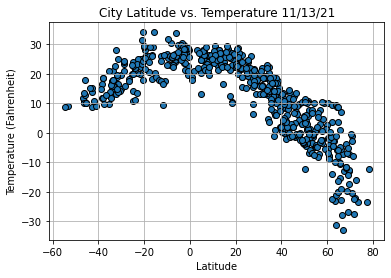

In [139]:
# from 'weather_data_clean' table
weather_Date_col = weather_data_clean['weather_date'][0]
plt.scatter(weather_data_clean["latitude"], weather_data_clean["temp"], marker="o",edgecolors='black')

# Graph
#title 
plt.title(f"City Latitude vs. Temperature {weather_Date_col}")

# x label
plt.xlabel("Latitude")

# y label
plt.ylabel("Temperature (Fahrenheit)")

# Show lines of the chart...
plt.grid(True)

# Save the figure
plt.savefig("../Images/Latitude_Vs_Temperature.png")

# Show plot
plt.show()

### City Latitude vs Humidity

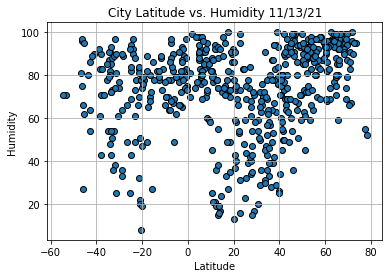

In [140]:
# from 'weather_data_clean' table
weather_Date_col = weather_data_clean['weather_date'][0]

# plot a scatter chart... with 'latitude' as x value and 'humidity' as y value
plt.scatter(weather_data_clean["latitude"], weather_data_clean["humidity"], marker="o",edgecolors='black')

# Graph
#title 
plt.title(f"City Latitude vs. Humidity {weather_Date_col}")

# x label
plt.xlabel("Latitude")

# y label
plt.ylabel("Humidity")

# Show lines of the chart...
plt.grid(True)

# Save the figure
plt.savefig("../Images/Latitude_Vs_Humidity.png")

# Show plot
plt.show()

### Latitude vs. Cloudiness Plot

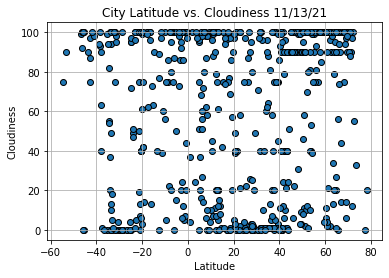

In [141]:
# from 'weather_data_clean' table
weather_Date_col = weather_data_clean['weather_date'][0]

# plot a scatter chart... with 'latitude' as x value and 'cloudiness' as y value
plt.scatter(weather_data_clean["latitude"], weather_data_clean["cloudiness"], marker="o",edgecolors='black')

# Graph
#title 
plt.title(f"City Latitude vs. Cloudiness {weather_Date_col}")

# x label
plt.xlabel("Latitude")

# y label
plt.ylabel("Cloudiness")

# Show lines of the chart...
plt.grid(True)

# Save the figure
plt.savefig("../Images/Latitude_Vs_Cloudiness.png")

# Show plot
plt.show()

### Latitude vs. Wind Speed Plot

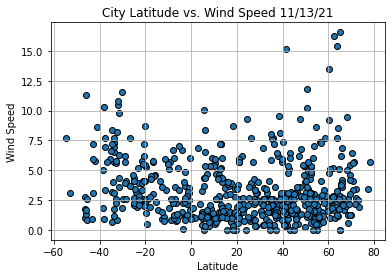

In [142]:
# from 'weather_data_clean' table
weather_Date_col = weather_data_clean['weather_date'][0]

# plot a scatter chart... with 'latitude' as x value and 'wind_speed' as y value
plt.scatter(weather_data_clean["latitude"], weather_data_clean["wind_speed"], marker="o",edgecolors='black')

# Graph
#title 
plt.title(f"City Latitude vs. Wind Speed {weather_Date_col}")

# x label
plt.xlabel("Latitude")

# y label
plt.ylabel("Wind Speed")

# Show lines of the chart...
plt.grid(True)

# Save the figure
plt.savefig("../Images/Latitude_Vs_Wind_Speed.png")

# Show plot
plt.show()

## Linear Regression

### Northern and Southern DataFrames

#### Northern Data Frame

In [143]:
weather_data_clean

,city_id,city_name,country,latitude,longitude,weather_date,temp,temp max,temp min,humidity,cloudiness,wind_speed
0,4032243,Vaini,TO,-21.2000,-175.2000,11/13/21,24.04,24.04,24.04,70.0,19.0,4.08
1,3366880,Hermanus,ZA,-34.4187,19.2345,11/13/21,12.11,14.94,12.11,87.0,55.0,3.20
2,964420,Port Elizabeth,ZA,-33.9180,25.5701,11/13/21,17.16,17.16,16.17,82.0,20.0,5.66
3,2264557,Ponta do Sol,PT,32.6667,-17.1000,11/13/21,18.62,20.00,17.85,70.0,10.0,0.94
4,1794209,Simao,CN,22.7886,100.9748,11/13/21,15.54,15.54,15.54,99.0,100.0,1.48
...,...,...,...,...,...,...,...,...,...,...,...,...
566,1788852,Xining,CN,36.6167,101.7667,11/13/21,-1.08,-1.08,-1.08,49.0,58.0,1.27
567,2093846,Kiunga,PG,-6.1219,141.2906,11/13/21,33.74,33.74,33.74,49.0,87.0,1.36
568,3354077,Opuwo,NA,-18.0607,13.8400,11/13/21,24.05,24.05,24.05,49.0,99.0,1.89
569,709584,Druzhba,UA,52.0428,33.9453,11/13/21,-0.53,-0.53,-0.53,89.0,70.0,2.63


In [144]:
# By this code... it will only take the column of 'wind_speed' and tell us what values equals or over 1. 
# false = less than one 
# true = more than one or equals
wind_speed_over_1 = weather_data_clean.wind_speed >= 1
print(wind_speed_over_1)

0       True
1       True
2       True
3      False
4       True
       ...  
566     True
567     True
568     True
569     True
570     True
Name: wind_speed, Length: 571, dtype: bool


In [145]:
# Apply the code from above for the northern hemisphere... According to the longitude, anything above or equals to 0 is considered NORTH
# If less than 0, it is conisdered SOUTH
northern_hemisphere = weather_data_clean.longitude >= 0
print(f"{northern_hemisphere}\n")
print("-" * 20)

# From above, we have a boolean of values... boolean is true or false... 
# We need to read the data that is only true 
northern_data = weather_data_clean[northern_hemisphere]
print(f"{northern_data}\n")
print("-" * 20)

# Now we weed to reset the index... since its index is off since the print tells us that its size is '[331 rows x 12 columns]'
northern_data = northern_data.reset_index(drop=True)

0      False
1       True
2       True
3      False
4       True
       ...  
566     True
567     True
568     True
569     True
570     True
Name: longitude, Length: 571, dtype: bool

--------------------
     city_id       city_name country  latitude  longitude weather_date   temp  \
1    3366880        Hermanus      ZA  -34.4187    19.2345     11/13/21  12.11   
2     964420  Port Elizabeth      ZA  -33.9180    25.5701     11/13/21  17.16   
4    1794209           Simao      CN   22.7886   100.9748     11/13/21  15.54   
9      80509     Al Bardīyah      LY   31.7561    25.0865     11/13/21  19.09   
10    160660        Chalinze      TZ   -6.6378    38.3540     11/13/21  24.00   
..       ...             ...     ...       ...        ...          ...    ...   
566  1788852          Xining      CN   36.6167   101.7667     11/13/21  -1.08   
567  2093846          Kiunga      PG   -6.1219   141.2906     11/13/21  33.74   
568  3354077           Opuwo      NA  -18.0607    13.8400     11

In [146]:
# Main clean northern data
northern_data

,city_id,city_name,country,latitude,longitude,weather_date,temp,temp max,temp min,humidity,cloudiness,wind_speed
0,3366880,Hermanus,ZA,-34.4187,19.2345,11/13/21,12.11,14.94,12.11,87.0,55.0,3.20
1,964420,Port Elizabeth,ZA,-33.9180,25.5701,11/13/21,17.16,17.16,16.17,82.0,20.0,5.66
2,1794209,Simao,CN,22.7886,100.9748,11/13/21,15.54,15.54,15.54,99.0,100.0,1.48
3,80509,Al Bardīyah,LY,31.7561,25.0865,11/13/21,19.09,19.09,19.09,63.0,100.0,2.08
4,160660,Chalinze,TZ,-6.6378,38.3540,11/13/21,24.00,24.00,24.00,82.0,100.0,0.74
...,...,...,...,...,...,...,...,...,...,...,...,...
319,1788852,Xining,CN,36.6167,101.7667,11/13/21,-1.08,-1.08,-1.08,49.0,58.0,1.27
320,2093846,Kiunga,PG,-6.1219,141.2906,11/13/21,33.74,33.74,33.74,49.0,87.0,1.36
321,3354077,Opuwo,NA,-18.0607,13.8400,11/13/21,24.05,24.05,24.05,49.0,99.0,1.89
322,709584,Druzhba,UA,52.0428,33.9453,11/13/21,-0.53,-0.53,-0.53,89.0,70.0,2.63


#### Southern Data Frame

In [147]:
weather_data_clean

,city_id,city_name,country,latitude,longitude,weather_date,temp,temp max,temp min,humidity,cloudiness,wind_speed
0,4032243,Vaini,TO,-21.2000,-175.2000,11/13/21,24.04,24.04,24.04,70.0,19.0,4.08
1,3366880,Hermanus,ZA,-34.4187,19.2345,11/13/21,12.11,14.94,12.11,87.0,55.0,3.20
2,964420,Port Elizabeth,ZA,-33.9180,25.5701,11/13/21,17.16,17.16,16.17,82.0,20.0,5.66
3,2264557,Ponta do Sol,PT,32.6667,-17.1000,11/13/21,18.62,20.00,17.85,70.0,10.0,0.94
4,1794209,Simao,CN,22.7886,100.9748,11/13/21,15.54,15.54,15.54,99.0,100.0,1.48
...,...,...,...,...,...,...,...,...,...,...,...,...
566,1788852,Xining,CN,36.6167,101.7667,11/13/21,-1.08,-1.08,-1.08,49.0,58.0,1.27
567,2093846,Kiunga,PG,-6.1219,141.2906,11/13/21,33.74,33.74,33.74,49.0,87.0,1.36
568,3354077,Opuwo,NA,-18.0607,13.8400,11/13/21,24.05,24.05,24.05,49.0,99.0,1.89
569,709584,Druzhba,UA,52.0428,33.9453,11/13/21,-0.53,-0.53,-0.53,89.0,70.0,2.63


In [148]:
# Apply the code from above for the southern hemisphere... According to the longitude, anything above or equals to 0 is considered NORTH
# If less than 0, it is conisdered SOUTH
southern_hemisphere = weather_data_clean.longitude < 0
print(f"{southern_hemisphere}\n")
print("-" * 20)

# From above, we have a boolean of values... boolean is true or false... 
# We need to read the data that is only true 
southern_data = weather_data_clean[southern_hemisphere]
print(f"{southern_data}\n")
print("-" * 20)

# Now we weed to reset the index... since its index is off since the print tells us that its size is '[331 rows x 12 columns]'
southern_data = southern_data.reset_index(drop=True)

0       True
1      False
2      False
3       True
4      False
       ...  
566    False
567    False
568    False
569    False
570    False
Name: longitude, Length: 571, dtype: bool

--------------------
     city_id           city_name country  latitude  longitude weather_date  \
0    4032243               Vaini      TO  -21.2000  -175.2000     11/13/21   
3    2264557        Ponta do Sol      PT   32.6667   -17.1000     11/13/21   
5    3374210          São Filipe      CV   14.8961   -24.4956     11/13/21   
6    3579925        St. George's      GD   12.0564   -61.7485     11/13/21   
7    5969025     Haines Junction      CA   60.7522  -137.5108     11/13/21   
..       ...                 ...     ...       ...        ...          ...   
549  4004293              Ixtapa      MX   20.7000  -105.2000     11/13/21   
550  2738381                Lata      PT   40.1629    -8.3327     11/13/21   
551  2645525          Kincardine      GB   56.0667    -3.7167     11/13/21   
557  3398381 

In [149]:
# Main clean northern data
southern_data

,city_id,city_name,country,latitude,longitude,weather_date,temp,temp max,temp min,humidity,cloudiness,wind_speed
0,4032243,Vaini,TO,-21.2000,-175.2000,11/13/21,24.04,24.04,24.04,70.0,19.0,4.08
1,2264557,Ponta do Sol,PT,32.6667,-17.1000,11/13/21,18.62,20.00,17.85,70.0,10.0,0.94
2,3374210,São Filipe,CV,14.8961,-24.4956,11/13/21,23.98,23.98,23.98,72.0,42.0,3.48
3,3579925,St. George's,GD,12.0564,-61.7485,11/13/21,26.82,26.82,26.82,78.0,20.0,2.57
4,5969025,Haines Junction,CA,60.7522,-137.5108,11/13/21,-4.03,-4.03,-4.03,68.0,100.0,1.03
...,...,...,...,...,...,...,...,...,...,...,...,...
242,4004293,Ixtapa,MX,20.7000,-105.2000,11/13/21,22.52,22.52,22.52,91.0,3.0,1.04
243,2738381,Lata,PT,40.1629,-8.3327,11/13/21,12.99,13.23,6.23,71.0,11.0,1.62
244,2645525,Kincardine,GB,56.0667,-3.7167,11/13/21,5.43,8.44,3.41,97.0,81.0,1.12
245,3398381,Icatu,BR,-2.7758,-44.0658,11/13/21,28.24,28.24,28.24,86.0,6.0,2.69


### Northern Plot Chart

The r-squared is: -0.7338839273012461



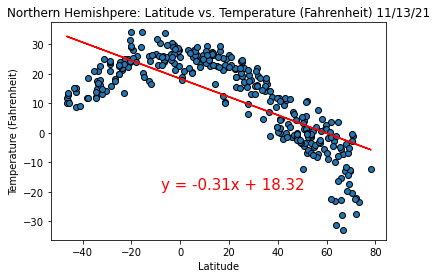

In [150]:
# from 'weather_data_clean' table
weather_Date_col = weather_data_clean['weather_date'][0]

# Labels for the values of the graph...
# seperate since we will copy and paste for Southern also
x_values = northern_data['latitude']
y_values = northern_data['temp']
x_label = 'Latitude'
y_label = 'Temperature (Fahrenheit)'
blank_hemisphere = 'Northern Hemishpere'

# Code for values 
linregress_outcome = linregress(x_values, y_values)
# print(linregress_outcome)
# outcome: LinregressResult(slope=-0.2931210488228063, intercept=16.939987154977036, rvalue=-0.7253865028981034, 
# pvalue=2.6231932592028583e-55, stderr=0.015334998012898633)

# each variable equals to assigned position... slope: 0, intercept: 1 etc.
(slope, intercept, rvalue, pvalue, stderr) = linregress_outcome

# Code for the Regress Plot
regress_outcome = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# plots for graph/chart
plt.scatter(x_values,y_values,edgecolors='black')
plt.title(f"{blank_hemisphere}: {x_label} vs. {y_label} {weather_Date_col}")
# plot a line graph... color red
plt.plot(x_values, regress_outcome, "r-")

# plot the line_eq into the chart
#                     (x, y) look at chart and figure out where to place it
plt.annotate(line_eq,(-8,-19),fontsize=15,color="red")

plt.xlabel(x_label)
plt.ylabel(y_label)

# print out the r-squared value
print(f"The r-squared is: {rvalue}\n")

# Save the figure
plt.savefig("../Images/North_Latitude_Vs_Temperature.png")

# Show Graph
plt.show()


The r-squared is: 0.2189459338146624



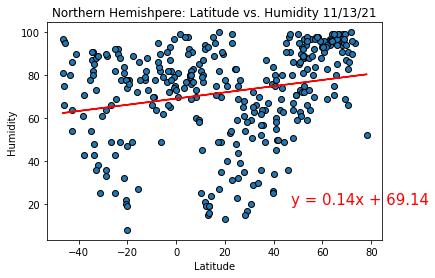

In [151]:
# from 'weather_data_clean' table
weather_Date_col = weather_data_clean['weather_date'][0]

# Labels for the values of the graph...
# seperate since we will copy and paste for Southern also
x_values = northern_data['latitude']
y_values = northern_data['humidity']
x_label = 'Latitude'
y_label = 'Humidity'
blank_hemisphere = 'Northern Hemishpere'

# Code for values 
linregress_outcome = linregress(x_values, y_values)
# print(linregress_outcome)
# outcome: LinregressResult(slope=-0.2931210488228063, intercept=16.939987154977036, rvalue=-0.7253865028981034, 
# pvalue=2.6231932592028583e-55, stderr=0.015334998012898633)

# each variable equals to assigned position... slope: 0, intercept: 1 etc.
(slope, intercept, rvalue, pvalue, stderr) = linregress_outcome

# Code for the Regress Plot
regress_outcome = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# plots for graph/chart
plt.scatter(x_values,y_values,edgecolors='black')
plt.title(f"{blank_hemisphere}: {x_label} vs. {y_label} {weather_Date_col}")
# plot a line graph... color red
plt.plot(x_values, regress_outcome, "r-")

# plot the line_eq into the chart
#                     (x, y) look at chart and figure out where to place it
plt.annotate(line_eq,(47,20),fontsize=15,color="red")

plt.xlabel(x_label)
plt.ylabel(y_label)

# print out the r-squared value
print(f"The r-squared is: {rvalue}\n")

# Save the figure
plt.savefig("../Images/North_Latitude_Vs_Humidity.png")

# Show Graph
plt.show()


The r-squared is: 0.12286669044730122
The line equation is: y = 0.15x + 60.87



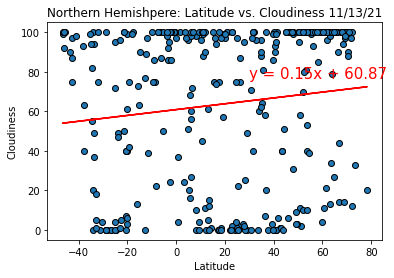

In [152]:
# from 'weather_data_clean' table
weather_Date_col = weather_data_clean['weather_date'][0]

# Labels for the values of the graph...
# seperate since we will copy and paste for Southern also
x_values = northern_data['latitude']
y_values = northern_data['cloudiness']
x_label = 'Latitude'
y_label = 'Cloudiness'
blank_hemisphere = 'Northern Hemishpere'

# Code for values 
linregress_outcome = linregress(x_values, y_values)
# print(linregress_outcome)
# outcome: LinregressResult(slope=-0.2931210488228063, intercept=16.939987154977036, rvalue=-0.7253865028981034, 
# pvalue=2.6231932592028583e-55, stderr=0.015334998012898633)

# each variable equals to assigned position... slope: 0, intercept: 1 etc.
(slope, intercept, rvalue, pvalue, stderr) = linregress_outcome

# Code for the Regress Plot
regress_outcome = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# plots for graph/chart
plt.scatter(x_values,y_values,edgecolors='black')
plt.title(f"{blank_hemisphere}: {x_label} vs. {y_label} {weather_Date_col}")
# plot a line graph... color red
plt.plot(x_values, regress_outcome, "r-")

# plot the line_eq into the chart
#                     (x, y) look at chart and figure out where to place it
plt.annotate(line_eq,(30,77),fontsize=15,color="red")

plt.xlabel(x_label)
plt.ylabel(y_label)

# print out the r-squared value
print(f"The r-squared is: {rvalue}")
print(f"The line equation is: {line_eq}\n")

# Save the figure
plt.savefig("../Images/North_Latitude_Vs_Cloudiness.png")

# Show Graph
plt.show()


### Southern Plot Chart

The r-squared is: -0.6331196965067121



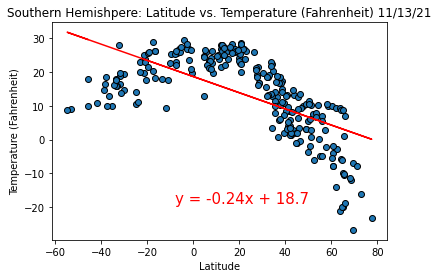

In [153]:
# from 'weather_data_clean' table
weather_Date_col = weather_data_clean['weather_date'][0]

# Labels for the values of the graph...
# seperate since we will copy and paste for Southern also
x_values = southern_data['latitude']
y_values = southern_data['temp']
x_label = 'Latitude'
y_label = 'Temperature (Fahrenheit)'
blank_hemisphere = 'Southern Hemishpere'

# Code for values 
linregress_outcome = linregress(x_values, y_values)
# print(linregress_outcome)
# outcome: LinregressResult(slope=-0.2931210488228063, intercept=16.939987154977036, rvalue=-0.7253865028981034, 
# pvalue=2.6231932592028583e-55, stderr=0.015334998012898633)

# each variable equals to assigned position... slope: 0, intercept: 1 etc.
(slope, intercept, rvalue, pvalue, stderr) = linregress_outcome

# Code for the Regress Plot
regress_outcome = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# plots for graph/chart
plt.scatter(x_values,y_values,edgecolors='black')
plt.title(f"{blank_hemisphere}: {x_label} vs. {y_label} {weather_Date_col}")
# plot a line graph... color red
plt.plot(x_values, regress_outcome, "r-")

# plot the line_eq into the chart
#                     (x, y) look at chart and figure out where to place it
plt.annotate(line_eq,(-8,-19),fontsize=15,color="red")

plt.xlabel(x_label)
plt.ylabel(y_label)

# print out the r-squared value
print(f"The r-squared is: {rvalue}\n")

# Save the figure
plt.savefig("../Images/South_Latitude_Vs_Temperature.png")

# Show Graph
plt.show()


The r-squared is: 0.10698476282853706



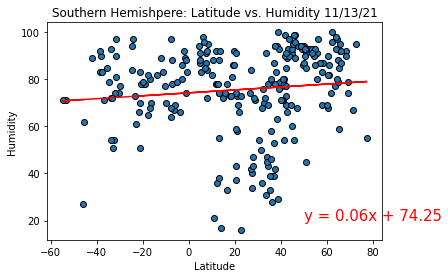

In [154]:
# from 'weather_data_clean' table
weather_Date_col = weather_data_clean['weather_date'][0]

# Labels for the values of the graph...
# seperate since we will copy and paste for Southern also
x_values = southern_data['latitude']
y_values = southern_data['humidity']
x_label = 'Latitude'
y_label = 'Humidity'
blank_hemisphere = 'Southern Hemishpere'

# Code for values 
linregress_outcome = linregress(x_values, y_values)
# print(linregress_outcome)
# outcome: LinregressResult(slope=-0.2931210488228063, intercept=16.939987154977036, rvalue=-0.7253865028981034, 
# pvalue=2.6231932592028583e-55, stderr=0.015334998012898633)

# each variable equals to assigned position... slope: 0, intercept: 1 etc.
(slope, intercept, rvalue, pvalue, stderr) = linregress_outcome

# Code for the Regress Plot
regress_outcome = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# plots for graph/chart
plt.scatter(x_values,y_values,edgecolors='black')
plt.title(f"{blank_hemisphere}: {x_label} vs. {y_label} {weather_Date_col}")
# plot a line graph... color red
plt.plot(x_values, regress_outcome, "r-")

# plot the line_eq into the chart
#                     (x, y) look at chart and figure out where to place it
plt.annotate(line_eq,(50,20),fontsize=15,color="red")

plt.xlabel(x_label)
plt.ylabel(y_label)

# print out the r-squared value
print(f"The r-squared is: {rvalue}\n")

# Save the figure
plt.savefig("../Images/South_Latitude_Vs_Humidity.png")

# Show Graph
plt.show()


The r-squared is: 0.05558744526952467



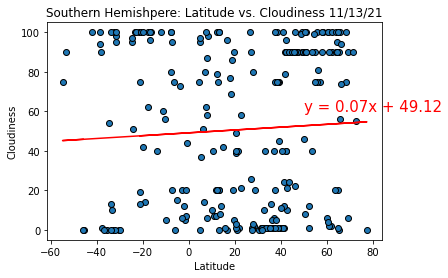

In [156]:
# from 'weather_data_clean' table
weather_Date_col = weather_data_clean['weather_date'][0]

# Labels for the values of the graph...
# seperate since we will copy and paste for Southern also
x_values = southern_data['latitude']
y_values = southern_data['cloudiness']
x_label = 'Latitude'
y_label = 'Cloudiness'
blank_hemisphere = 'Southern Hemishpere'

# Code for values 
linregress_outcome = linregress(x_values, y_values)
# print(linregress_outcome)
# outcome: LinregressResult(slope=-0.2931210488228063, intercept=16.939987154977036, rvalue=-0.7253865028981034, 
# pvalue=2.6231932592028583e-55, stderr=0.015334998012898633)

# each variable equals to assigned position... slope: 0, intercept: 1 etc.
(slope, intercept, rvalue, pvalue, stderr) = linregress_outcome

# Code for the Regress Plot
regress_outcome = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# plots for graph/chart
plt.scatter(x_values,y_values,edgecolors='black')
plt.title(f"{blank_hemisphere}: {x_label} vs. {y_label} {weather_Date_col}")
# plot a line graph... color red
plt.plot(x_values, regress_outcome, "r-")

# plot the line_eq into the chart
#                     (x, y) look at chart and figure out where to place it
plt.annotate(line_eq,(50,60),fontsize=15,color="red")

plt.xlabel(x_label)
plt.ylabel(y_label)

# print out the r-squared value
print(f"The r-squared is: {rvalue}\n")

# Save the figure
plt.savefig("../Images/South_Latitude_Vs_Cloudiness.png")

# Show Graph
plt.show()
